# Plotting with pandas

In this chapter, we learn how to plot directly from pandas DataFrames or Series. Internally, pandas uses matplotlib to do all of its plotting. Let's begin by reading in the stocks dataset.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
stocks = pd.read_csv('../data/stocks/stocks10.csv', index_col='date', parse_dates=['date'])
stocks.head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN


## Plotting a Series

pandas uses the Series index as the x-values and the values as y-values. By default, pandas creates a line plot. Let's plot Amazon's closing price for the last 5 years.

In [14]:
amzn = stocks['AMZN']
amzn.head(3)

date
1999-10-25    82.75
1999-10-26    81.25
1999-10-27    75.94
Name: AMZN, dtype: float64

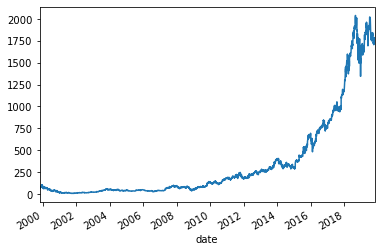

In [15]:
amzn.plot();

Get four years of data from Apple, Facebook, Schlumberger and Tesla beginning in 2014.

### Plot many Series one at a time

All calls to plot that happen in the same cell will be drawn on the same Axes unless otherwise specified. Let's plot several Series at the same time.

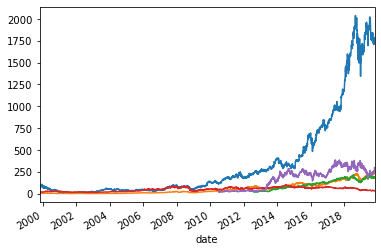

In [18]:
stocks['AMZN'].plot()
stocks['AAPL'].plot()
stocks['FB'].plot()
stocks['SLB'].plot()
stocks['TSLA'].plot();

### Plot all at once from the DataFrame

Instead of individually plotting Series, we can plot each column in the DataFrame at once with its `plot` method.

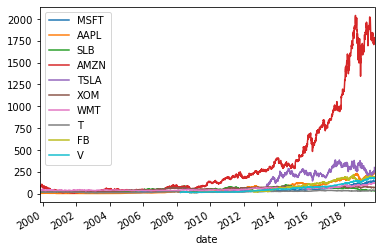

In [19]:
stocks.plot();

### Plotting in Pandas is Column based

The most important thing to know about plotting in pandas is that it is **column based**. pandas plots each column, one at a time. It uses the index as the x-values for each column and the values of each column as the y-values. The column names are put in the **legend**.

## Choosing other types of plots

pandas directly uses Matplotlib for all of its plotting and does not have any plotting capabilities on its own. pandas is simply calling Matplotlib's plotting functions and supplying the arguments for you. pandas provides a small subset of the total available types of plots that matplotlib offers. Use the `kind` parameter to choose one of the following types of plots.

* `line` : line plot (default)
* `bar` : vertical bar plot
* `barh` : horizontal bar plot
* `hist` : histogram
* `box` : boxplot
* `kde` : Kernel Density Estimation plot. `density` is an alias
* `area` : area plot
* `pie` : pie plot
* `scatter`: Does not plot all columns, you must choose x and y

### Histogram of the closing prices of Apple

Set the `kind` parameter to thee string 'hist' to plot a histogram of closing prices.

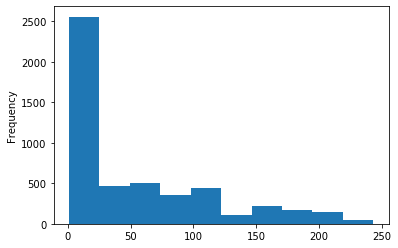

In [20]:
aapl = stocks['AAPL']
aapl.plot(kind='hist');

### Kernel Density Estimate

Very similar to a histogram, a kernel density estimate (use string 'kde') plot estimates the probability density function. 

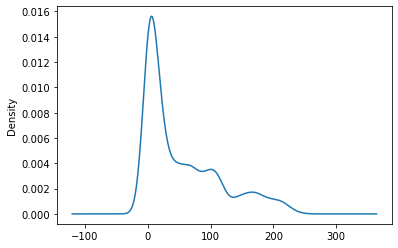

In [23]:
aapl.plot(kind='kde');

## Additional plotting parameters

To modify plots to your liking, pandas provides several of the same parameters found in matplotlib plotting functions. The most common are listed below:

* `linestyle` or `ls` - Pass a string of one of the following ['--', '-.', '-', ':']
* `color` or `c` - Can take a string of a named color, a string of the hexadecimal characters or a rgb tuple with each number between 0 and 1.
* `linewidth` or `lw` - controls thickness of line. Default is 1
* `alpha` - controls opacity with a number between 0 and 1
* `figsize` - a tuple used to control the size of the plot. (width, height) 
* `legend` - boolean to control whether or not to show legend.

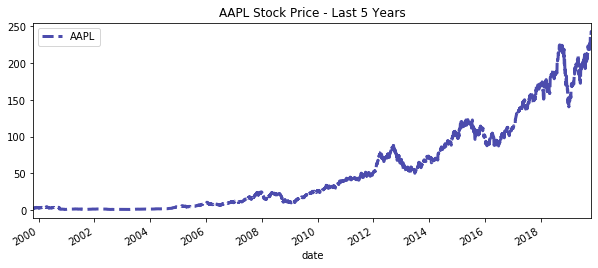

In [26]:
# Use several of the additional plotting arguemnts
aapl.plot(color="darkblue", 
          linestyle='--', 
          figsize=(10, 4), 
          linewidth=3, 
          alpha=.7, 
          legend=True,
          title="AAPL Stock Price - Last 5 Years");

### Diamonds dataset

Let's read in the diamonds dataset and begin making plots with it.

In [27]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Changing the defaults for a scatterplot

The default plot is a line plot and uses the index as the x-axis. Each column of the frame become the y-values. This worked well for stock price data where the date was in the index and ordered. For many datasets, you will have to explicitly set the x and y axis variables. Below is a scatterplot comparison of carat vs price.

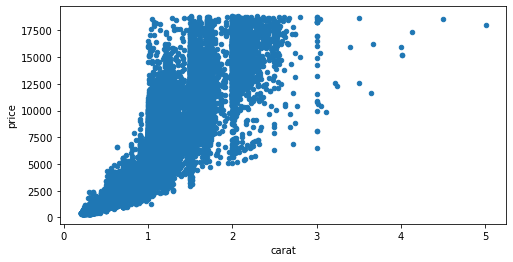

In [29]:
diamonds.plot(x='carat', y='price', kind='scatter', figsize=(8, 4));

In [30]:
diamonds.shape

(53940, 10)

### Sample the data when too many points

When there an abundance of data is present, sampling a fraction of the data can result in a more readable plot. Here, we sample five percent of the data and change the size of each point with the `s` parameter.

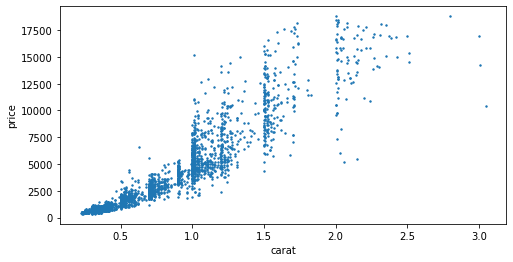

In [42]:
dia_sample = diamonds.sample(frac=.05)
dia_sample.plot('carat', 'price', kind='scatter', figsize=(8, 4), s=2);

### If you have tidy data, use `groupby/pivot_table`, then make a bar plot

If your data is tidy like it is with this diamonds dataset, you will likely need to aggregate it with either a `groupby` or a `pivot_table` to make it work with a bar plot.

### The index becomes the tick labels for String Indexes
Pandas nicely integrates the index into plotting by using it as the tick mark labels for many plots.

In [43]:
cut_count = diamonds['cut'].value_counts()
cut_count

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

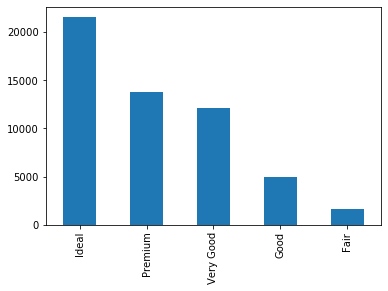

In [44]:
cut_count.plot(kind='bar');

### More than one grouping column in the index

It's possible to make plots with a Series that have a MultiIndex. 

In [48]:
cut_color_count = diamonds.groupby(['cut', 'color']).size()
cut_color_count.head(10)

cut   color
Fair  D        163
      E        224
      F        312
      G        314
      H        303
      I        175
      J        119
Good  D        662
      E        933
      F        909
dtype: int64

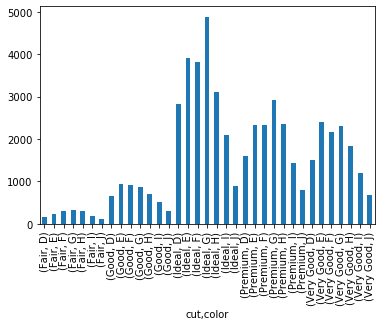

In [49]:
cut_color_count.plot(kind='bar');

### Thats quite ugly
Let's reshape and plot again.

In [50]:
cut_color_pivot = diamonds.pivot_table(index='cut', columns='color', aggfunc='size')
cut_color_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


Plot the whole DataFrame. The index always goes on the x-axis. Each column value is the y-value and the column names are used as labels in the legend.

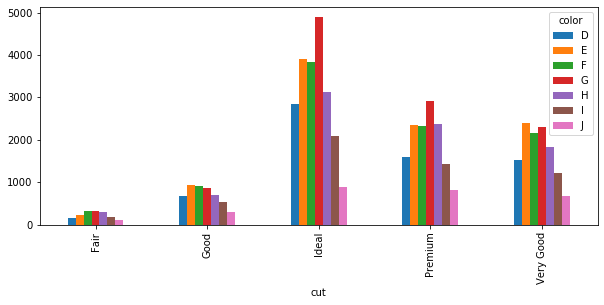

In [52]:
cut_color_pivot.plot(kind='bar', figsize=(10, 4));

## Pandas plots return matplotlib objects
After making a plot with pandas, you will see some text output immediately under the cell that was just executed. Pandas is returning to us the matplotlib Axes object. You can assign the result of the `plot` method to a variable.

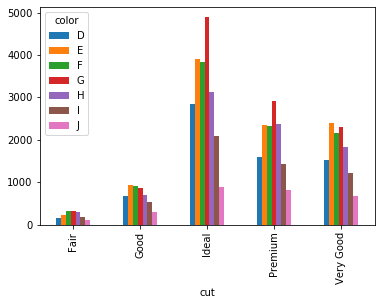

In [53]:
ax = cut_color_pivot.plot(kind='bar');

Verify that we have a matplotlib Axes object.

In [54]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Get the figure as an attribute of the Axes

In [55]:
fig = ax.figure
type(fig)

matplotlib.figure.Figure

### We can use the figure and axes as normal

Let's set a new title for the Axes and change the size of the Figure.

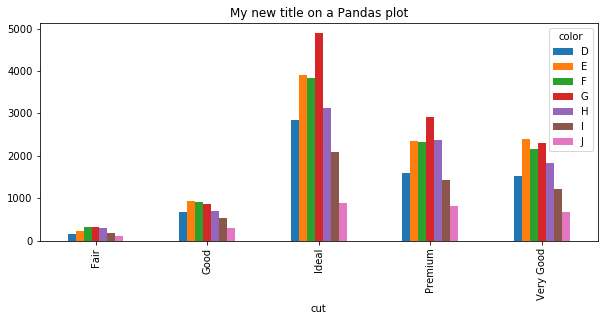

In [58]:
ax.set_title('My new title on a Pandas plot')
fig.set_size_inches(10, 4)
fig

## Exercises

### Exercise 1
<span  style="color:green; font-size:16px">In this exercise we will test whether daily returns from stocks are normally distributed. Complete the following tasks:


* Take the `df_stocks` DataFrame and call the **`pct_change`** method to get the daily return percentage and assign it to a variable. 
* Assign the mean and standard deviation of each column (these will return Series) to separate variables. 
* Standardize your columns by subtracting the mean and dividing by the standard deviation. You have now produced a **z-score** for each daily return. 
* Add a column to this DataFrame called **`noise`** by calling **`np.random.randn`** which creates random normal variables.
* Plot the KDE for each column in your DataFrame. If the stock returns are normal, then the shapes of the curves will all look the same.
* Limit the xaxis to be between -3 and 3.
* Are stock retunrs normally distributed?</span>

### Exercise 2
<span  style="color:green; font-size:16px">Use Pandas to plot a horizontal bar plot of diamond cuts.</span>

### Exercise 3
<span  style="color:green; font-size:16px">Make a visualization that easily shows the differences in average salary by sex for each department of the employee dataset.</span>

### Exercise 4
<span  style="color:green; font-size:16px">Split the employee data into two separate DataFrames. Those who have a hire date after the year 2000 and those who have one before. Make the same plot above for each group.</span>

### Exercise 5
<span  style="color:green; font-size:16px">Use the `flights` data set. Plot the counts of the number of flights per day of week.</span>

### Exercise 6
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week.</span>

### Exercise 7
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week per airline.</span>